In [163]:
from PIL import Image
import numpy as np
from scipy import linalg
from os import listdir
from matplotlib import image,pyplot as plt

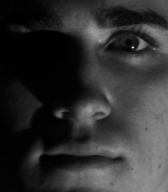

In [2]:
people = ["CroppedYale/{p}".format(p=person) for person in listdir("CroppedYale")]
shots = ["{p}/{s}".format(p=person,s=shot) for person in people for shot in listdir(person)]
images = [Image.open(shot) for shot in shots]
images[0]

In [3]:
data = [np.asarray(image) for image in images]
flat_data = np.array([d.flatten() for d in data])
flat_data.shape

(2432, 32256)

In [27]:
(U,S,Vh) = linalg.svd(flat_data)

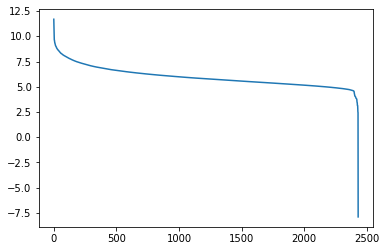

In [61]:
sing_vals = S**2

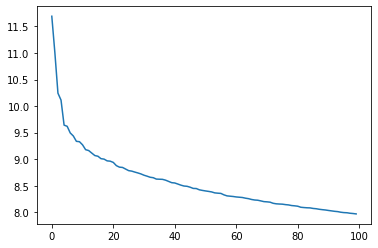

In [62]:
plt.plot(np.log10(sing_vals)[0:100])

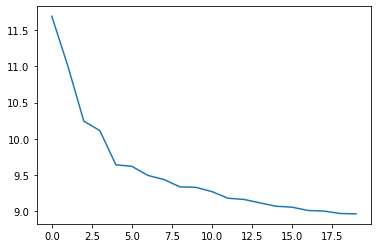

In [63]:
plt.plot(np.log10(sing_vals)[0:20]) # we canlikely take between 3-8 columns

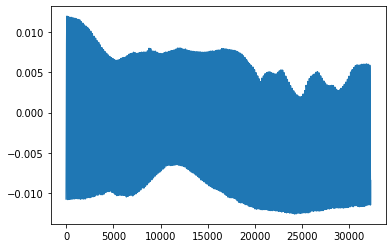

In [66]:
##
#
# We can interpret Vh as being an orthonormal basis for "untransformed space"
# We can interpret sigma as being the scaling factors for our new orthonormal basis
# We can interpret U as being the orthonormal basis that A transformed V into
#
# To reconstruct images using only some modes we can write A ~ U_trunc S_trunc Vh_trunc
# Where tilde denotes truncation
#
##

In [206]:
U_trunc = U[:,:3]
S_trunc = np.diag(S[:3])
Vh_trunc = Vh[:3,:]

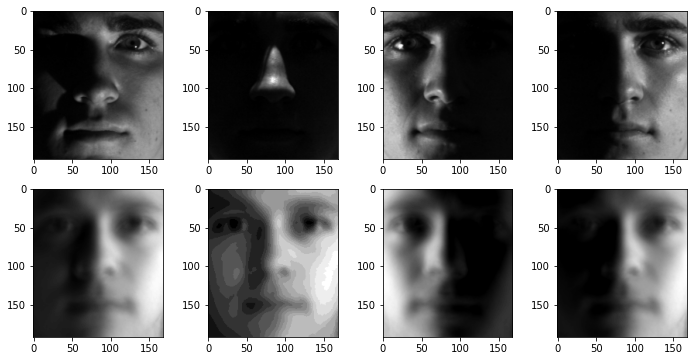

In [207]:
A_approx = U_trunc @ S_trunc @ Vh_trunc
appr_data = [np.reshape(np.maximum(A_approx[i,:],0),data[0].shape) for i in range(len(images))]
appr_images = [Image.fromarray(d.astype(np.uint8)) for d in appr_data]
fig,axs = plt.subplots(2,4,figsize=(12,6))
axs[0,0].imshow(images[0],cmap="gray")
axs[0,1].imshow(images[1],cmap="gray")
axs[0,2].imshow(images[2],cmap="gray")
axs[0,3].imshow(images[3],cmap="gray")
axs[1,0].imshow(appr_images[0],cmap="gray")
axs[1,1].imshow(np.asarray(appr_images[1]),cmap="gray")
axs[1,2].imshow(appr_images[2],cmap="gray")
axs[1,3].imshow(appr_images[3],cmap="gray")
plt.show()

In [208]:
U_trunc = U[:,:20]
S_trunc = np.diag(S[:20])
Vh_trunc = Vh[:20,:]

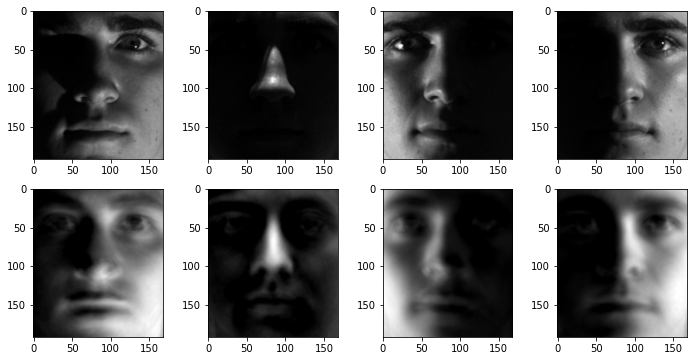

In [209]:
A_approx = U_trunc @ S_trunc @ Vh_trunc
appr_data = [np.reshape(np.maximum(A_approx[i,:],0),data[0].shape) for i in range(len(images))]
appr_images = [Image.fromarray(d.astype(np.uint8)) for d in appr_data]
fig,axs = plt.subplots(2,4,figsize=(12,6))
axs[0,0].imshow(images[0],cmap="gray")
axs[0,1].imshow(images[1],cmap="gray")
axs[0,2].imshow(images[2],cmap="gray")
axs[0,3].imshow(images[3],cmap="gray")
axs[1,0].imshow(appr_images[0],cmap="gray")
axs[1,1].imshow(np.asarray(appr_images[1]),cmap="gray")
axs[1,2].imshow(appr_images[2],cmap="gray")
axs[1,3].imshow(appr_images[3],cmap="gray")
plt.show()

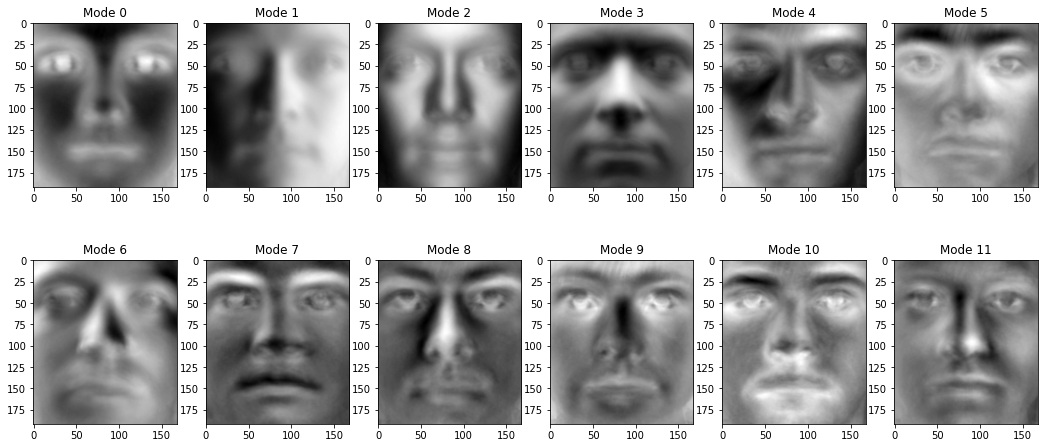

In [205]:
basis = [Vh[i,:] for i in range(100)]
shifted = [v - np.min(v) for v in basis]
rescaled = [127*v/np.max(v) for v in shifted]
reshaped = [np.reshape(v,data[0].shape) for v in rescaled]
basis_imgs = [Image.fromarray(v.astype(np.uint8)) for v in reshaped]
fig,axs = plt.subplots(2,6,figsize=(18,8))
flat_axs = [a for a_list in axs for a in a_list]
for i in range(12):
    flat_axs[i].imshow(basis_imgs[i],cmap="gray")
    flat_axs[i].title.set_text("Mode "+str(i))
